In [2]:
using LinearAlgebra 
using Kronecker
using Plots
using Distributions

Defining the Standard Gates as Matrices 

and creating a random array "h" 

for the disordered Magnetic Field in Z-direction


In [3]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

#h=rand(Float64,12)





Computing the Floquet Unitary:

In [4]:
o=pi/4;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o)));
#ZRow=copy(kronecker(RZ(h[1]*o),RZ(h[2]*o),RZ(h[3]*o),RZ(h[4]*o),RZ(h[5]*o),RZ(h[6]*o),RZ(h[7]*o),RZ(h[8]*o),RZ(h[9]*o),RZ(h[10]*o),RZ(h[11]*o),RZ(h[12]*o)));
UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));


# The MBL Regime: 

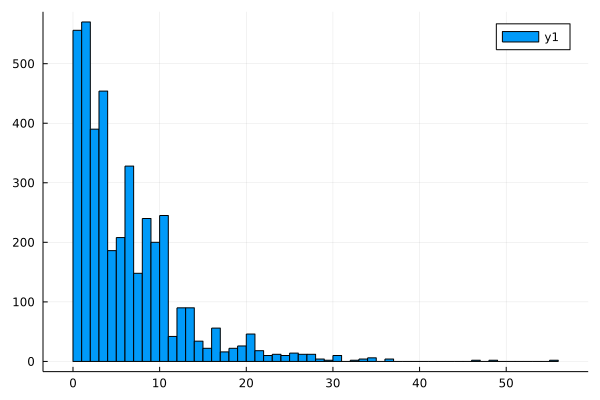

In [11]:


lambda=0.0;


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)


In [15]:
mean(m)

6.282824460450352

## Recall without disorder this model is Integrable at low coupling:

In [22]:


lambda=0.01;


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)

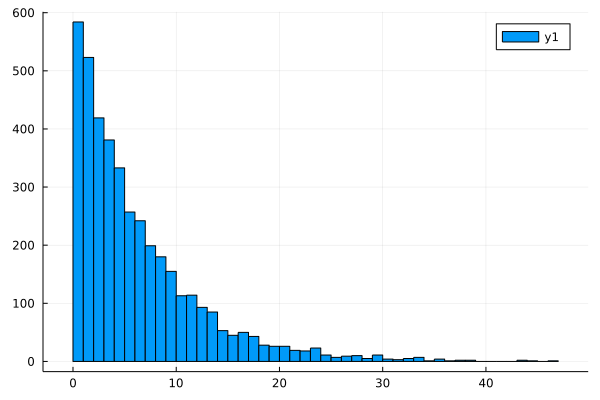

In [19]:

ZRow=copy(kronecker(RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o)));

lambda=0.6;


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)

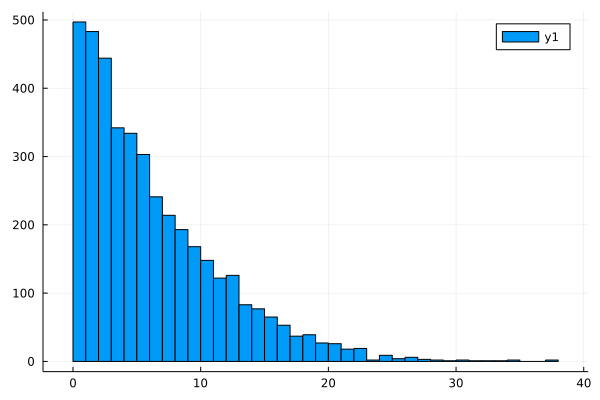

In [20]:

ZRow=copy(kronecker(RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o)));

lambda=0.9;


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)

# The Thermal Regime:

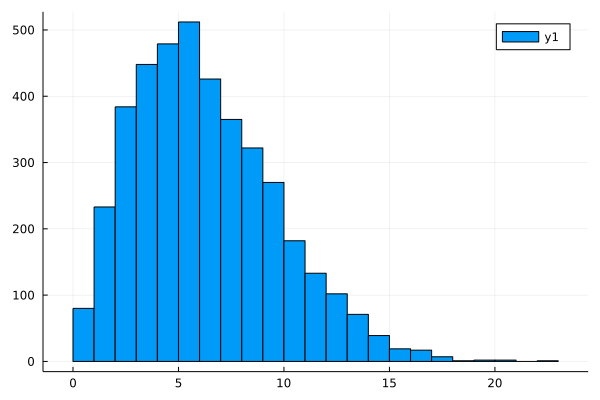

In [6]:
lambda=1.0;


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)



In [7]:
mean(m)

6.2829730282948715

# Attempting a variation of Order Parameters:

In [5]:
ordpar=fill(0.1,20);


for l in 1:20
    lambda=l*0.05;
    
UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

ordpar[l]=mean(m);
end
ordpar

20-element Vector{Float64}:
 5.701758289565352
 5.73093928109194
 5.814785031091727
 6.0572738996633495
 6.27506010440639
 6.284101069231725
 6.282440014517544
 6.282442095249698
 6.283841387893038
 6.282820406265356
 6.283532618876124
 6.282986665319646
 6.283236072815576
 6.280298629059588
 6.282394307146031
 6.282286936054444
 6.279609626664761
 6.278971036389277
 6.279899591751724
 6.282175075490522

In [1]:
ordpar=fill(0.1,20);


for l in 1:20
    lambda=l*0.05;
    
UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

ordpar[l]=mean(m);
end
ordpar

LoadError: UndefVarError: dim not defined

In [6]:
xax=1:20

1:20

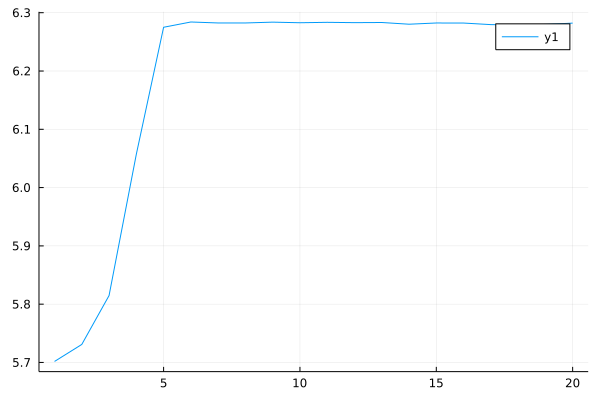

In [7]:
plot(xax,ordpar)

# The Old Complete Code:

In [ ]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);




lambda=1.0;
o=pi/4;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)))
#ZRow=copy(kronecker(RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o)));
ZRow=copy(kronecker(RZ(h[1]*o),RZ(h[2]*o),RZ(h[3]*o),RZ(h[4]*o),RZ(h[5]*o),RZ(h[6]*o),RZ(h[7]*o),RZ(h[8]*o),RZ(h[9]*o),RZ(h[10]*o),RZ(h[11]*o),RZ(h[12]*o)));
UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)
